In [12]:
import numpy as np

In [8]:
def matrix_multiply(A, B):
    """
    Multiplies two matrices A and B using the standard matrix multiplication algorithm.
    Returns the product matrix C = AB.
    Assumes that the dimensions of A and B are compatible for matrix multiplication.
    """
    n = len(A)
    C = np.zeros(n, n)
    for i in range(n):
        for j in range(n):
            for k in range(n):
                C[i][j] += A[i][k] * B[k][j]
    return C


In [7]:
def strassen(A, B, cross_over_point):

    """
    Multiplies two matrices A and B using the Strassen algorithm.
    Returns the product matrix C = AB.
    Assumes that the dimensions of A and B are compatible for matrix multiplication.
    """

    # Convert the matrices to numpy arrays to increase efficiency
    A = np.asarray(A)
    B = np.asarray(B)

    if len(A) <= cross_over_point: 
        return matrix_multiply(A, B)

    if A.shape[0] % 2 == 1:
        A = np.pad(A, [(0,1), (0,1)], mode='constant')
        B = np.pad(B, [(0,1), (0,1)], mode='constant')
    
    # Split the matrices into quadrants, make views of the original matrices to avoid excessive memory allocation
        
    mid = len(A) // 2
    A_1 = [A[:mid][:mid]]
    B = [A[mid:][:mid]]
    C = [A[:mid][mid:]]
    D = [A[mid:][mid:]]
    E = [B[:mid][:mid]]
    F = [B[mid:][:mid]]
    G = [B[:mid][mid:]]
    H = [B[mid:][mid:]]
    
    # Compute the seven products using recursive calls to Strassen's algorithm
    P1 = strassen(A_1, F-H, cross_over_point) 
    P2 = strassen(A_1 + B, H, cross_over_point)
    P3 = strassen(C + D, E, cross_over_point)
    P4 = strassen(D, G - E, cross_over_point)
    P5 = strassen(A_1 + D, E + H, cross_over_point)
    P6 = strassen(B - D, G + H, cross_over_point)
    P7 = strassen(C - A_1, E + F, cross_over_point)
    
    # Compute the four quadrants of the final product matrix C
    ae_bg = -P2 + P4 + P5 + P6
    af_bh = P1 + P2
    ce_dg = P3 + P4
    cf_dh = P1 - P3 + P5 + P7

    C = np.block([ae_bg, af_bh], 
                 [ce_dg, cf_dh])

    return C

In [9]:
#Test experimentally for the cross over point

import timeit

store_time = np.zeros(101)

for i in range(1, 101):
    cross_over_point = i
    n = cross_over_point

    #Create two random matrices of size n x n, with entires in {0, 1}
    A = np.random.rand(n, n)
    B = np.random.rand(n, n)
    A = np.round(A)
    B = np.round(B)

    strassen_time = timeit.timeit(lambda: strassen(A, B, cross_over_point), number = 10)
    normal_time = timeit.timeit(lambda: matrix_multiply(A, B))

    time_difference = abs(strassen_time - normal_time)
    store_time[i] = time_difference
    print(time_difference)

min_position = np.argmin(store_time)
print("Cross-over point is:", min_position)


TypeError: Cannot interpret '1' as a data type

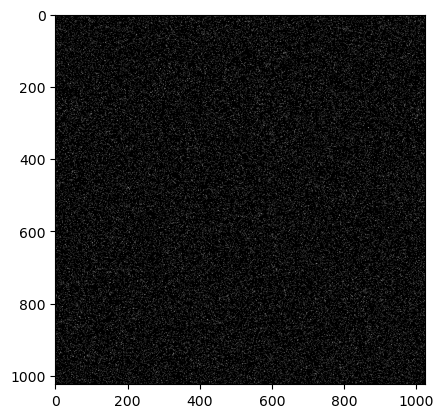

In [22]:
import matplotlib.pyplot as plt

def graph(vertices, probability): 
    """
    Returns a random graph with the specified number of vertices and edge probability.
    """
    graph = np.zeros((vertices, vertices))
    for i in range(vertices):
        for j in range(vertices):
            if i != j:
                if np.random.rand() < probability:
                    graph[i][j] = 1
    return graph

cross_over_point = 32

G = graph(1024, 0.05) 
G_2 = strassen(G, G, cross_over_point)
G_3 = strassen(G_2, G, cross_over_point)
plt.imshow(G, cmap='gray')
plt.show()

